In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display

In [2]:
childMortality = pd.read_csv(r"C:\Users\terzh\Downloads\1211103705_DATA SCIENCE FUNDAMENTALS\DataSci Assignment\datasets\child-mortality-rate-vs-mean-male-height-cm.csv")
HDI = pd.read_csv(r"C:\Users\terzh\Downloads\1211103705_DATA SCIENCE FUNDAMENTALS\DataSci Assignment\datasets\human-development-index-vs-mean-male-height.csv")
cropYields = pd.read_csv(r"C:\Users\terzh\Downloads\1211103705_DATA SCIENCE FUNDAMENTALS\DataSci Assignment\datasets\key-crop-yields.csv")
caloricSupply = pd.read_csv(r"C:\Users\terzh\Downloads\1211103705_DATA SCIENCE FUNDAMENTALS\DataSci Assignment\datasets\daily-per-capita-caloric-supply.csv")
proteinSupply = pd.read_csv(r"C:\Users\terzh\Downloads\1211103705_DATA SCIENCE FUNDAMENTALS\DataSci Assignment\datasets\daily-per-capita-protein-supply.csv")
fatSupply = pd.read_csv(r"C:\Users\terzh\Downloads\1211103705_DATA SCIENCE FUNDAMENTALS\DataSci Assignment\datasets\daily-per-capita-fat-supply.csv")
eggConsumption = pd.read_csv(r"C:\Users\terzh\Downloads\1211103705_DATA SCIENCE FUNDAMENTALS\DataSci Assignment\datasets\per-capita-egg-consumption-kilograms-per-year.csv")
meatConsumption = pd.read_csv(r"C:\Users\terzh\Downloads\1211103705_DATA SCIENCE FUNDAMENTALS\DataSci Assignment\datasets\per-capita-meat-consumption-by-type-kilograms-per-year.csv")
milkConsumption = pd.read_csv(r"C:\Users\terzh\Downloads\1211103705_DATA SCIENCE FUNDAMENTALS\DataSci Assignment\datasets\per-capita-milk-consumption.csv")
animalProtein = pd.read_csv(r"C:\Users\terzh\Downloads\1211103705_DATA SCIENCE FUNDAMENTALS\DataSci Assignment\datasets\share-of-calories-from-animal-protein-vs-mean-male-height.csv")

In [3]:
childMortalityCor = childMortality.drop(["Code", "Continent"], axis=1)
HDICor = HDI.drop(["Code", "Continent", "Mean male height (cm)"], axis=1)
cropYieldsCor = cropYields.drop(["Code"], axis=1)
caloricSupplyCor = caloricSupply.drop(["Code"], axis=1)
proteinSupplyCor = proteinSupply.drop(["Code"], axis=1)
fatSupplyCor = fatSupply.drop(["Code"], axis=1)
eggConsumptionCor = eggConsumption.drop(["Code"], axis=1)
meatConsumptionCor = meatConsumption.drop(["Code"], axis=1)
milkConsumptionCor = milkConsumption.drop(["Code"], axis=1)
animalProteinCor = animalProtein.drop(["Code", "Continent"], axis=1)


'''
dailyMeatCor = dailyMeat.drop(["Code"], axis=1)
globalFoodCor = globalFood.drop(["Product", "Production (t)", "production__tonnes__per_capita", "Production per capita (kg)", "Yield (t/ha)",
                                 "Yield (kg/animal)", "Land Use (ha)", "area_harvested__ha__per_capita", "Land Use per capita (m²)",
                                 "Producing or slaughtered animals", "Producing or slaughtered animals per capita", "Imports (t)", 
                                 "imports__tonnes__per_capita", "Imports per capita (kg)", "Exports (t)", "exports__tonnes__per_capita", 
                                 "Exports per capita (kg)", "Domestic supply (t)", "domestic_supply__tonnes__per_capita", 
                                 "Domestic supply per capita (kg)", "Food (t)", "food__tonnes__per_capita", "Food per capita (kg)", 
                                 "Animal feed (t)", "feed__tonnes__per_capita", "Animal feed per capita (kg)", "Other uses (t)", 
                                 "other_uses__tonnes__per_capita", "Other uses per capita (kg)", "Supply chain waste (t)", 
                                 "waste_in_supply_chain__tonnes__per_capita", "Supply chain waste per capita (kg)", 
                                 "Food supply (kg per capita per year)", "Food supply (g per capita per day)"], axis=1)
globalFoodCor = globalFoodCor.rename(columns={'Country': 'Entity'})
'''
HDICor

,Entity,Year,Human Development Index,Population (historical estimates)
0,Abkhazia,2015,NaN,NaN
1,Afghanistan,1990,0.284,10694804.0
2,Afghanistan,1991,0.292,10745168.0
3,Afghanistan,1992,0.299,12057436.0
4,Afghanistan,1993,0.307,14003764.0
...,...,...,...,...
59822,Zimbabwe,1891,NaN,1010281.0
59823,Zimbabwe,1892,NaN,1020609.0
59824,Zimbabwe,1893,NaN,1031042.0
59825,Zimbabwe,1894,NaN,1041582.0


In [4]:
dfs = [childMortalityCor, HDICor, cropYieldsCor, caloricSupplyCor, proteinSupplyCor, fatSupplyCor, 
       eggConsumptionCor, meatConsumptionCor, milkConsumptionCor, animalProteinCor]
mergeResult = reduce(lambda  left,right: pd.merge(left,right,on = ["Entity", "Year"]), dfs)
mergeResult = mergeResult.drop(["Mean male height (cm)_y", "Population (historical estimates)"], axis=1)

mergeResult = mergeResult.rename(columns={'Observation value - Unit of measure: Deaths per 100 live births - Indicator: Under-five mortality rate - Sex: Both sexes - Wealth quintile: All wealth quintiles': 'Deaths per 100 births'})
mergeResult = mergeResult.rename(columns={'Daily calorie supply per person that comes from animal protein': 'Daily calorie supply from animal protein'})
mergeResult = mergeResult.rename(columns={'Mean male height (cm)_x': 'Mean male height (cm)'})
mergeResult = mergeResult.rename(columns={'Wheat | 00000015 || Yield | 005419 || tonnes per hectare': 'Wheat Yields (tonnes per hectare)'})
mergeResult = mergeResult.rename(columns={'Rice | 00000027 || Yield | 005419 || tonnes per hectare': 'Rice Yields (tonnes per hectare)'})
mergeResult = mergeResult.rename(columns={'Bananas | 00000486 || Yield | 005419 || tonnes per hectare': 'Banana Yields (tonnes per hectare)'})
mergeResult = mergeResult.rename(columns={'Maize | 00000056 || Yield | 005419 || tonnes per hectare': 'Maize Yields (tonnes per hectare)'})
mergeResult = mergeResult.rename(columns={'Soybeans | 00000236 || Yield | 005419 || tonnes per hectare': 'Soybean Yields (tonnes per hectare)'})
mergeResult = mergeResult.rename(columns={'Potatoes | 00000116 || Yield | 005419 || tonnes per hectare': 'Potato Yields (tonnes per hectare)'})
mergeResult = mergeResult.rename(columns={'Beans, dry | 00000176 || Yield | 005419 || tonnes per hectare': 'Bean Yields (tonnes per hectare)'})
mergeResult = mergeResult.rename(columns={'Peas, dry | 00000187 || Yield | 005419 || tonnes per hectare': 'Pea Yields (tonnes per hectare)'})
mergeResult = mergeResult.rename(columns={'Cassava | 00000125 || Yield | 005419 || tonnes per hectare': 'Cassava Yields (tonnes per hectare)'})
mergeResult = mergeResult.rename(columns={'Cocoa beans | 00000661 || Yield | 005419 || tonnes per hectare': 'Cocoa Yields (tonnes per hectare)'})
mergeResult = mergeResult.rename(columns={'Barley | 00000044 || Yield | 005419 || tonnes per hectare': 'Barley Yields (tonnes per hectare)'})
mergeResult = mergeResult.rename(columns={'Daily calorie supply per person': 'Calorie supply (per day per capita)'})
mergeResult = mergeResult.rename(columns={'Total | 00002901 || Food available for consumption | 0674pc || grams of protein per day per capita': 'Protein supply (grams per day per capita)'})
mergeResult = mergeResult.rename(columns={'Total | 00002901 || Food available for consumption | 0684pc || grams of fat per day per capita': 'Fat supply (grams per day per capita)'})
mergeResult = mergeResult.rename(columns={'Eggs | 00002949 || Food available for consumption | 0645pc || kilograms per year per capita': 'Egg consumption (kilograms per year per capita)'})
mergeResult = mergeResult.rename(columns={'Meat, Other | 00002735 || Food available for consumption | 0645pc || kilograms per year per capita': 'Other meats consumption (kilograms per year per capita)'})
mergeResult = mergeResult.rename(columns={'Meat, sheep and goat | 00002732 || Food available for consumption | 0645pc || kilograms per year per capita': 'Sheep and goat consumption (kilograms per year per capita)'})
mergeResult = mergeResult.rename(columns={'Meat, beef | 00002731 || Food available for consumption | 0645pc || kilograms per year per capita': 'Beef consumption (kilograms per year per capita)'})
mergeResult = mergeResult.rename(columns={'Meat, pig | 00002733 || Food available for consumption | 0645pc || kilograms per year per capita': 'Pig consumption (kilograms per year per capita)'})
mergeResult = mergeResult.rename(columns={'Meat, poultry | 00002734 || Food available for consumption | 0645pc || kilograms per year per capita': 'Poultry consumption (kilograms per year per capita)'})
mergeResult = mergeResult.rename(columns={'Milk - Excluding Butter | 00002848 || Food available for consumption | 0645pc || kilograms per year per capita': 'Milk consumption (kilograms per year per capita)'})
mergeResult

,Entity,Year,Deaths per 100 births,Mean male height (cm),Human Development Index,Wheat Yields (tonnes per hectare),Rice Yields (tonnes per hectare),Banana Yields (tonnes per hectare),Maize Yields (tonnes per hectare),Soybean Yields (tonnes per hectare),...,Protein supply (grams per day per capita),Fat supply (grams per day per capita),Egg consumption (kilograms per year per capita),Other meats consumption (kilograms per year per capita),Sheep and goat consumption (kilograms per year per capita),Beef consumption (kilograms per year per capita),Pig consumption (kilograms per year per capita),Poultry consumption (kilograms per year per capita),Milk consumption (kilograms per year per capita),Daily calorie supply from animal protein
0,Afghanistan,1961,35.165825,164.797132,NaN,1.0220,1.5190,NaN,1.4000,NaN,...,86.492840,38.209236,0.957523,0.865845,8.332486,4.889479,NaN,0.641744,60.405430,55.128870
1,Afghanistan,1962,34.583990,164.849830,NaN,0.9735,1.5190,NaN,1.4000,NaN,...,84.580055,38.335213,1.029475,0.896969,8.072717,5.106605,NaN,0.672726,59.699370,54.959705
2,Afghanistan,1963,34.015938,164.899145,NaN,0.8317,1.5190,NaN,1.4260,NaN,...,78.657250,39.338820,1.060731,1.091328,8.251259,5.160862,NaN,0.673156,65.143130,57.932200
3,Afghanistan,1964,33.484780,164.943613,NaN,0.9510,1.7273,NaN,1.4257,NaN,...,85.198880,39.747234,1.081696,1.030673,8.520909,5.132955,NaN,0.683714,65.360985,58.493233
4,Afghanistan,1965,32.942093,164.983130,NaN,0.9723,1.7273,NaN,1.4400,NaN,...,85.612100,40.560085,1.122982,1.082147,8.820517,5.094256,NaN,0.714625,70.053690,61.008570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9769,Zimbabwe,2017,5.617513,NaN,0.552,1.7542,0.3745,7.381700,1.3933,1.5513,...,55.679996,65.529990,1.320000,2.500000,1.810000,41.409996,0.74,5.090000,24.089998,105.919990
9770,Zimbabwe,2018,5.368769,NaN,0.564,2.7178,0.4025,7.528800,1.3506,1.8680,...,54.399960,67.029945,1.349999,2.389998,1.819999,40.989970,0.52,4.379997,23.919983,101.919920
9771,Zimbabwe,2019,5.266589,NaN,0.560,3.9149,0.4484,7.873500,0.7807,0.6954,...,53.960014,64.130010,1.240000,2.370001,1.770001,40.980010,0.69,4.470001,25.390007,100.560030
9772,Zimbabwe,2020,5.176960,NaN,0.554,4.7796,0.6114,8.086699,1.1801,1.8147,...,56.550026,69.250030,1.090000,2.270001,1.760001,40.120018,0.64,7.210003,24.050010,111.960045


In [5]:
result1 = mergeResult.drop(["Human Development Index"], axis=1)
result1 = result1[result1["Mean male height (cm)"].notna()]
result1

,Entity,Year,Deaths per 100 births,Mean male height (cm),Wheat Yields (tonnes per hectare),Rice Yields (tonnes per hectare),Banana Yields (tonnes per hectare),Maize Yields (tonnes per hectare),Soybean Yields (tonnes per hectare),Potato Yields (tonnes per hectare),...,Protein supply (grams per day per capita),Fat supply (grams per day per capita),Egg consumption (kilograms per year per capita),Other meats consumption (kilograms per year per capita),Sheep and goat consumption (kilograms per year per capita),Beef consumption (kilograms per year per capita),Pig consumption (kilograms per year per capita),Poultry consumption (kilograms per year per capita),Milk consumption (kilograms per year per capita),Daily calorie supply from animal protein
0,Afghanistan,1961,35.165825,164.797132,1.0220,1.5190,NaN,1.4000,NaN,8.666699,...,86.492840,38.209236,0.957523,0.865845,8.332486,4.889479,NaN,0.641744,60.405430,55.128870
1,Afghanistan,1962,34.583990,164.849830,0.9735,1.5190,NaN,1.4000,NaN,7.666700,...,84.580055,38.335213,1.029475,0.896969,8.072717,5.106605,NaN,0.672726,59.699370,54.959705
2,Afghanistan,1963,34.015938,164.899145,0.8317,1.5190,NaN,1.4260,NaN,8.133300,...,78.657250,39.338820,1.060731,1.091328,8.251259,5.160862,NaN,0.673156,65.143130,57.932200
3,Afghanistan,1964,33.484780,164.943613,0.9510,1.7273,NaN,1.4257,NaN,8.599999,...,85.198880,39.747234,1.081696,1.030673,8.520909,5.132955,NaN,0.683714,65.360985,58.493233
4,Afghanistan,1965,32.942093,164.983130,0.9723,1.7273,NaN,1.4400,NaN,8.800000,...,85.612100,40.560085,1.122982,1.082147,8.820517,5.094256,NaN,0.714625,70.053690,61.008570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9744,Zimbabwe,1992,8.759365,169.340762,5.0893,2.2222,4.6667,0.4108,1.1336,15.625000,...,50.666435,48.200188,1.351793,1.403388,1.052541,7.099493,1.021584,1.578812,34.548110,37.974030
9745,Zimbabwe,1993,9.165906,169.152276,5.7708,2.5000,5.1250,1.6526,1.9341,15.789499,...,49.694330,48.759640,1.267024,1.672056,0.986617,4.330729,0.716595,1.568201,27.552572,31.613280
9746,Zimbabwe,1994,9.548888,168.963595,5.4649,2.2549,5.2469,1.2133,2.1217,15.897400,...,49.195250,48.490055,1.220935,1.799826,1.020954,4.536404,0.842024,1.494592,24.387120,31.449594
9747,Zimbabwe,1995,9.865066,168.774934,5.0360,2.1768,4.8485,0.5949,1.6791,15.789499,...,48.645620,49.344337,1.408023,1.958529,1.026904,4.626362,1.005731,1.651516,20.199312,31.463497


In [6]:
#Can skip this part if you save the data
result1.to_csv('Height(CleanData).csv', index=False)

In [7]:
result2 = mergeResult.drop(["Mean male height (cm)"], axis=1)
result2 = result2[result2["Human Development Index"].notna()]
result2

,Entity,Year,Deaths per 100 births,Human Development Index,Wheat Yields (tonnes per hectare),Rice Yields (tonnes per hectare),Banana Yields (tonnes per hectare),Maize Yields (tonnes per hectare),Soybean Yields (tonnes per hectare),Potato Yields (tonnes per hectare),...,Protein supply (grams per day per capita),Fat supply (grams per day per capita),Egg consumption (kilograms per year per capita),Other meats consumption (kilograms per year per capita),Sheep and goat consumption (kilograms per year per capita),Beef consumption (kilograms per year per capita),Pig consumption (kilograms per year per capita),Poultry consumption (kilograms per year per capita),Milk consumption (kilograms per year per capita),Daily calorie supply from animal protein
29,Afghanistan,1990,17.845098,0.284,1.0510,1.9029,NaN,1.7582,NaN,16.8421,...,72.635910,53.089370,1.085919,1.053012,12.625178,8.095032,NaN,1.162701,72.252000,74.368996
30,Afghanistan,1991,17.222792,0.292,1.0213,1.9364,NaN,1.6800,NaN,16.6418,...,70.025140,48.264060,1.079838,1.079838,12.781995,8.051835,NaN,1.138525,76.457220,76.245950
31,Afghanistan,1992,16.634613,0.299,1.0313,1.7143,NaN,1.5000,NaN,16.6667,...,62.682700,43.655660,0.962234,1.145517,11.031330,7.170937,NaN,1.053876,70.059830,68.456110
32,Afghanistan,1993,16.077510,0.307,1.0211,1.7143,NaN,1.6786,NaN,16.6912,...,61.583107,35.846720,0.834401,1.061964,9.395135,6.946115,NaN,0.845237,68.214966,63.327760
33,Afghanistan,1994,15.550792,0.300,1.0250,1.9000,NaN,1.6667,NaN,16.5942,...,58.492700,34.003414,0.767957,0.885283,8.682177,7.338253,NaN,0.757291,73.233200,64.039055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9769,Zimbabwe,2017,5.617513,0.552,1.7542,0.3745,7.381700,1.3933,1.5513,7.0743,...,55.679996,65.529990,1.320000,2.500000,1.810000,41.409996,0.74,5.090000,24.089998,105.919990
9770,Zimbabwe,2018,5.368769,0.564,2.7178,0.4025,7.528800,1.3506,1.8680,7.1275,...,54.399960,67.029945,1.349999,2.389998,1.819999,40.989970,0.52,4.379997,23.919983,101.919920
9771,Zimbabwe,2019,5.266589,0.560,3.9149,0.4484,7.873500,0.7807,0.6954,7.0782,...,53.960014,64.130010,1.240000,2.370001,1.770001,40.980010,0.69,4.470001,25.390007,100.560030
9772,Zimbabwe,2020,5.176960,0.554,4.7796,0.6114,8.086699,1.1801,1.8147,6.4695,...,56.550026,69.250030,1.090000,2.270001,1.760001,40.120018,0.64,7.210003,24.050010,111.960045


In [8]:
result2.to_csv('HDI(CleanData).csv', index=False)

In [9]:
#Rerun the clean datas
height_data = pd.read_csv(r"C:\Users\terzh\Downloads\1211103705_DATA SCIENCE FUNDAMENTALS\DataSci Assignment\Height(CleanData).csv")
hdi_data  = pd.read_csv(r"C:\Users\terzh\Downloads\1211103705_DATA SCIENCE FUNDAMENTALS\DataSci Assignment\HDI(CleanData).csv")

In [10]:
df_merged = pd.merge(height_data, hdi_data, on=['Entity', 'Year'], how='inner')

# Inspect column names
print(df_merged.columns)

# Correct the column names based on inspection
# Assuming 'Deaths per 100 births' is actually 'Deaths per 100 births_x'
mean_deaths_per_100_births = df_merged['Deaths per 100 births_x'].mean()
df_merged['Deaths per 100 births_x'] = df_merged['Deaths per 100 births_x'].fillna(mean_deaths_per_100_births)

# Impute other relevant columns with their mean values if necessary
macronutrient_columns = ['Calorie supply (per day per capita)_x', 'Protein supply (grams per day per capita)_x', 'Fat supply (grams per day per capita)_x']
for col in macronutrient_columns:
    df_merged[col] = df_merged[col].fillna(df_merged[col].mean())

# Step 4: Correlation analysis
correlation_matrix = df_merged[['Mean male height (cm)', 'Deaths per 100 births_x', 'Human Development Index'] + macronutrient_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Index(['Entity', 'Year', 'Deaths per 100 births_x', 'Mean male height (cm)',
       'Wheat Yields (tonnes per hectare)_x',
       'Rice Yields (tonnes per hectare)_x',
       'Banana Yields (tonnes per hectare)_x',
       'Maize Yields (tonnes per hectare)_x',
       'Soybean Yields (tonnes per hectare)_x',
       'Potato Yields (tonnes per hectare)_x',
       'Bean Yields (tonnes per hectare)_x',
       'Pea Yields (tonnes per hectare)_x',
       'Cassava Yields (tonnes per hectare)_x',
       'Cocoa Yields (tonnes per hectare)_x',
       'Barley Yields (tonnes per hectare)_x',
       'Calorie supply (per day per capita)_x',
       'Protein supply (grams per day per capita)_x',
       'Fat supply (grams per day per capita)_x',
       'Egg consumption (kilograms per year per capita)_x',
       'Other meats consumption (kilograms per year per capita)_x',
       'Sheep and goat consumption (kilograms per year per capita)_x',
       'Beef consumption (kilograms per year per capita)_x',
  

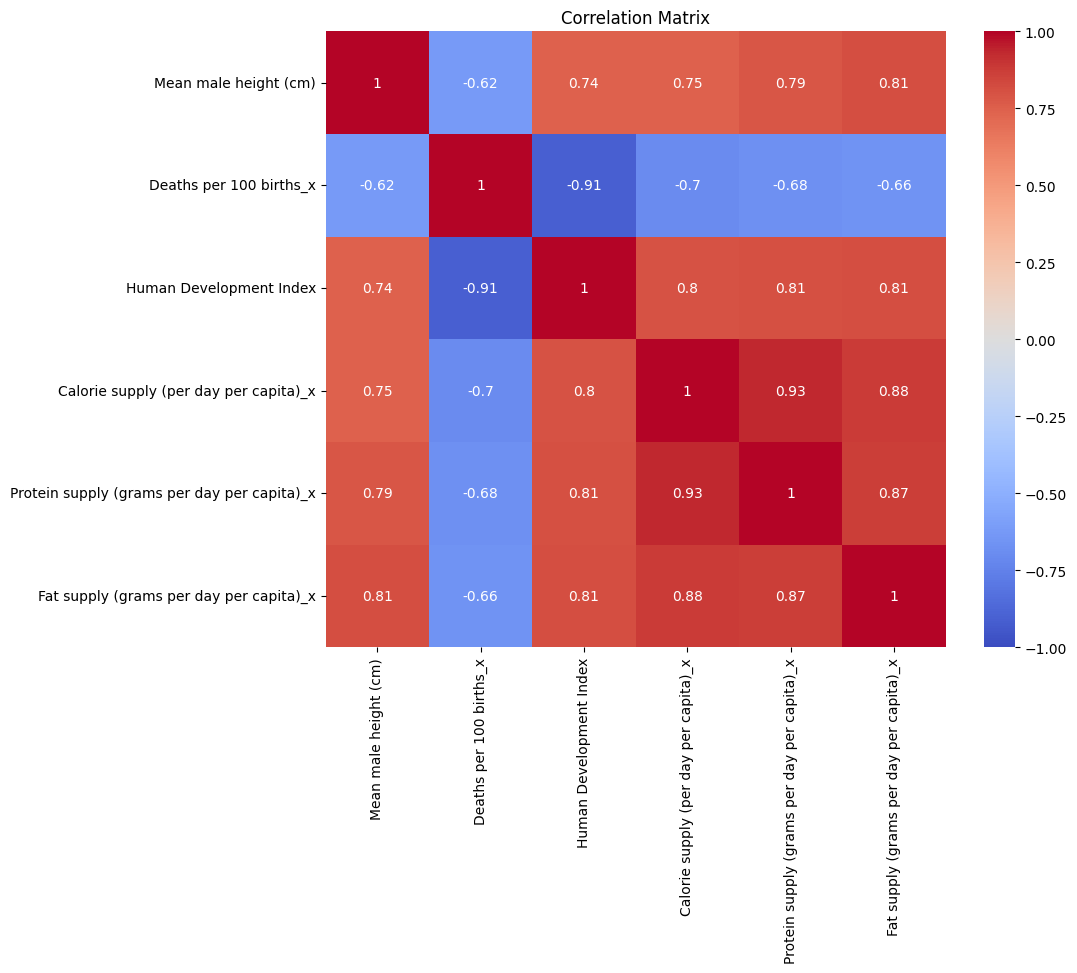

In [11]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Missing Values after mean imputation:
Entity                                                            0
Year                                                              0
Deaths per 100 births_x                                           0
Mean male height (cm)                                             0
Wheat Yields (tonnes per hectare)_x                             266
Rice Yields (tonnes per hectare)_x                              267
Banana Yields (tonnes per hectare)_x                            361
Maize Yields (tonnes per hectare)_x                             111
Soybean Yields (tonnes per hectare)_x                           423
Potato Yields (tonnes per hectare)_x                            138
Bean Yields (tonnes per hectare)_x                              282
Pea Yields (tonnes per hectare)_x                               426
Cassava Yields (tonnes per hectare)_x                           454
Cocoa Yields (tonnes per hectare)_x                             605
Barley Yie

C:\Users\terzh\AppData\Local\Temp\ipykernel_22348\2751268495.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['Deaths per 100 births_x'].fillna(mean_deaths_per_100_births, inplace=True)


,Entity,Year,Deaths per 100 births_x,Mean male height (cm),Wheat Yields (tonnes per hectare)_x,Rice Yields (tonnes per hectare)_x,Banana Yields (tonnes per hectare)_x,Maize Yields (tonnes per hectare)_x,Soybean Yields (tonnes per hectare)_x,Potato Yields (tonnes per hectare)_x,...,Protein supply (grams per day per capita)_y,Fat supply (grams per day per capita)_y,Egg consumption (kilograms per year per capita)_y,Other meats consumption (kilograms per year per capita)_y,Sheep and goat consumption (kilograms per year per capita)_y,Beef consumption (kilograms per year per capita)_y,Pig consumption (kilograms per year per capita)_y,Poultry consumption (kilograms per year per capita)_y,Milk consumption (kilograms per year per capita)_y,Daily calorie supply from animal protein_y
0,Afghanistan,1990,17.845098,165.340645,1.0510,1.9029,NaN,1.7582,NaN,16.8421,...,72.635910,53.089370,1.085919,1.053012,12.625178,8.095032,NaN,1.162701,72.252000,74.368996
1,Afghanistan,1991,17.222792,165.326165,1.0213,1.9364,NaN,1.6800,NaN,16.6418,...,70.025140,48.264060,1.079838,1.079838,12.781995,8.051835,NaN,1.138525,76.457220,76.245950
2,Afghanistan,1992,16.634613,165.312076,1.0313,1.7143,NaN,1.5000,NaN,16.6667,...,62.682700,43.655660,0.962234,1.145517,11.031330,7.170937,NaN,1.053876,70.059830,68.456110
3,Afghanistan,1993,16.077510,165.298103,1.0211,1.7143,NaN,1.6786,NaN,16.6912,...,61.583107,35.846720,0.834401,1.061964,9.395135,6.946115,NaN,0.845237,68.214966,63.327760
4,Afghanistan,1994,15.550792,165.284148,1.0250,1.9000,NaN,1.6667,NaN,16.5942,...,58.492700,34.003414,0.767957,0.885283,8.682177,7.338253,NaN,0.757291,73.233200,64.039055


Entity                                                            0
Year                                                              0
Deaths per 100 births_x                                           0
Mean male height (cm)                                             0
Wheat Yields (tonnes per hectare)_x                             266
Rice Yields (tonnes per hectare)_x                              267
Banana Yields (tonnes per hectare)_x                            361
Maize Yields (tonnes per hectare)_x                             111
Soybean Yields (tonnes per hectare)_x                           423
Potato Yields (tonnes per hectare)_x                            138
Bean Yields (tonnes per hectare)_x                              282
Pea Yields (tonnes per hectare)_x                               426
Cassava Yields (tonnes per hectare)_x                           454
Cocoa Yields (tonnes per hectare)_x                             605
Barley Yields (tonnes per hectare)_x            


Correlation Matrix after mean imputation:
                         Mean male height (cm)  Deaths per 100 births_x  \
Mean male height (cm)                 1.000000                -0.621827   
Deaths per 100 births_x              -0.621827                 1.000000   
Human Development Index               0.743171                -0.910841   

                         Human Development Index  
Mean male height (cm)                   0.743171  
Deaths per 100 births_x                -0.910841  
Human Development Index                 1.000000  


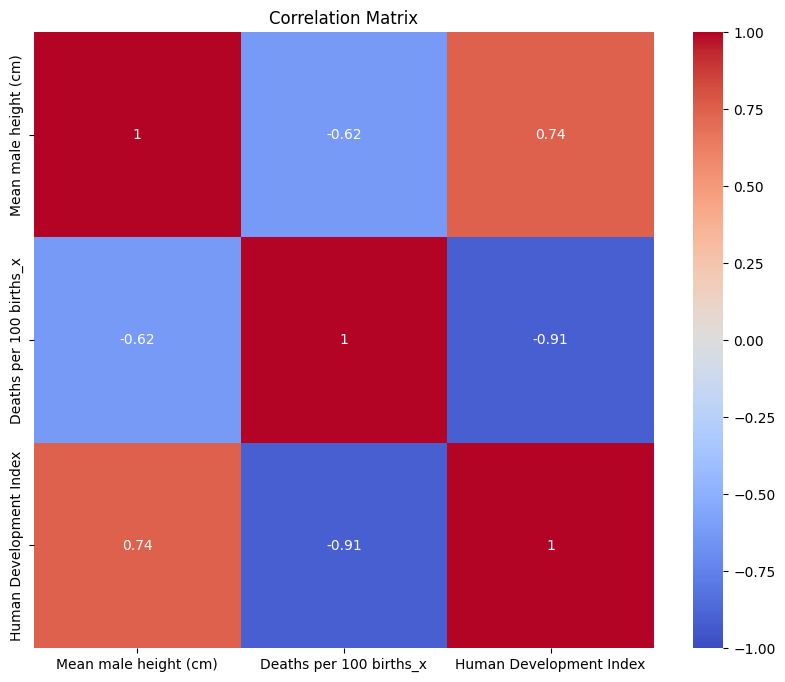

In [12]:
# Impute missing values with mean
mean_deaths_per_100_births = df_merged['Deaths per 100 births_x'].mean()
df_merged['Deaths per 100 births_x'].fillna(mean_deaths_per_100_births, inplace=True)

# Recalculate missing values after imputation
missing_values = df_merged.isnull().sum()
print("Missing Values after mean imputation:")
print(missing_values)


display(df_merged.head(), missing_values)
# Analyze correlations again
correlation_matrix = df_merged[['Mean male height (cm)', 'Deaths per 100 births_x', 'Human Development Index']].corr()
print("\nCorrelation Matrix after mean imputation:")
print(correlation_matrix)


# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

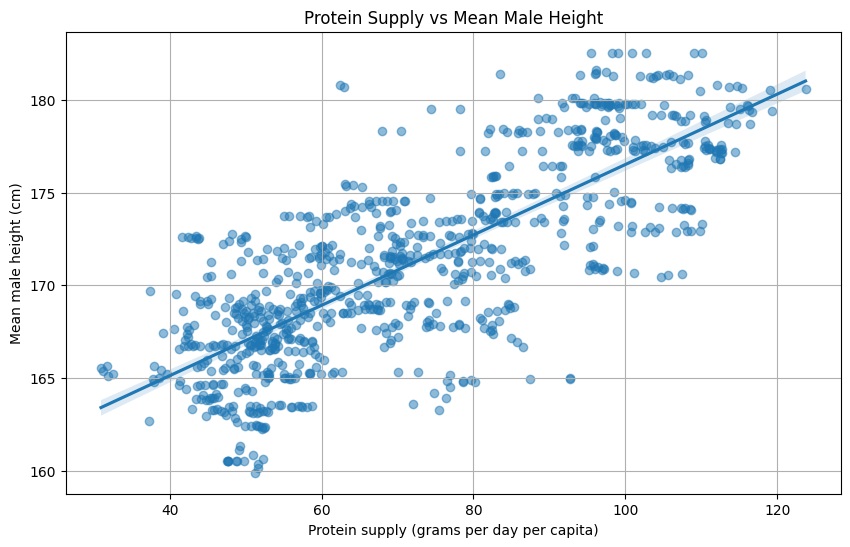

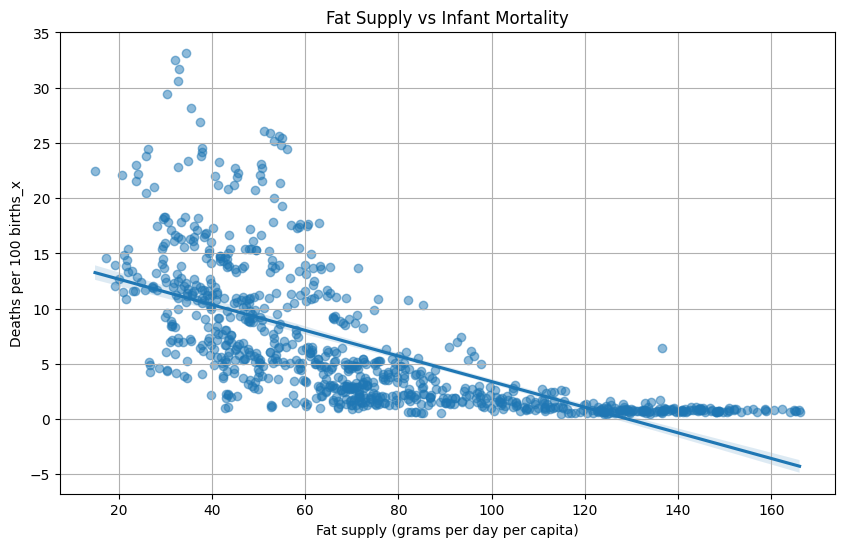

In [13]:
# Step 5: Scatter plots with regression lines
plt.figure(figsize=(10, 6))
sns.regplot(x='Protein supply (grams per day per capita)_x', y='Mean male height (cm)', data=df_merged, scatter_kws={'alpha':0.5})
plt.title('Protein Supply vs Mean Male Height')
plt.xlabel('Protein supply (grams per day per capita)')
plt.ylabel('Mean male height (cm)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Fat supply (grams per day per capita)_x', y='Deaths per 100 births_x', data=df_merged, scatter_kws={'alpha':0.5})
plt.title('Fat Supply vs Infant Mortality')
plt.xlabel('Fat supply (grams per day per capita)')
plt.ylabel('Deaths per 100 births_x')
plt.grid(True)
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_merged is your merged DataFrame with relevant columns
# Ensure df_merged contains columns related to features (X) and target variable (y)

# Define features (X) and target variable (y) for Physical Growth Patterns (e.g., Mean male height)
X_growth = df_merged[['Protein supply (grams per day per capita)_x']]
y_growth = df_merged['Mean male height (cm)']

# Split the data into training and testing sets (80% training, 20% testing)
X_growth_train, X_growth_test, y_growth_train, y_growth_test = train_test_split(X_growth, y_growth, test_size=0.2, random_state=42)

# Initialize and train the linear regression model for Physical Growth Patterns
model_growth = LinearRegression()
model_growth.fit(X_growth_train, y_growth_train)

# Make predictions on the test set
y_growth_pred = model_growth.predict(X_growth_test)

# Evaluate the model for Physical Growth Patterns
mse_growth = mean_squared_error(y_growth_test, y_growth_pred)
r2_growth = r2_score(y_growth_test, y_growth_pred)

# Display the model coefficients, mean squared error, and R^2 score for Physical Growth Patterns
print("Physical Growth Patterns:")
print(f"Coefficient: {model_growth.coef_[0]}")
print(f"Mean Squared Error: {mse_growth:.2f}")
print(f"R^2 Score: {r2_growth:.2f}")
print()

# Define features (X) and target variable (y) for Infant Mortality (e.g., Deaths per 100 births)
X_mortality = df_merged[['Fat supply (grams per day per capita)_x']]
y_mortality = df_merged['Deaths per 100 births_x']

# Split the data into training and testing sets (80% training, 20% testing)
X_mortality_train, X_mortality_test, y_mortality_train, y_mortality_test = train_test_split(X_mortality, y_mortality, test_size=0.2, random_state=42)

# Initialize and train the linear regression model for Infant Mortality
model_mortality = LinearRegression()
model_mortality.fit(X_mortality_train, y_mortality_train)

# Make predictions on the test set
y_mortality_pred = model_mortality.predict(X_mortality_test)

# Evaluate the model for Infant Mortality
mse_mortality = mean_squared_error(y_mortality_test, y_mortality_pred)
r2_mortality = r2_score(y_mortality_test, y_mortality_pred)

# Display the model coefficients, mean squared error, and R^2 score for Infant Mortality
print("Infant Mortality:")
print(f"Coefficient: {model_mortality.coef_[0]}")
print(f"Mean Squared Error: {mse_mortality:.2f}")
print(f"R^2 Score: {r2_mortality:.2f}")

Physical Growth Patterns:
Coefficient: 0.18717764240376072
Mean Squared Error: 10.95
R^2 Score: 0.64

Infant Mortality:
Coefficient: -0.1165476980430059
Mean Squared Error: 22.22
R^2 Score: 0.45


In [15]:
#Sub Question 2

In [16]:
# Select relevant columns for the analysis
height_data_selected = height_data[['Entity', 'Year', 'Protein supply (grams per day per capita)', 'Fat supply (grams per day per capita)', 'Calorie supply (per day per capita)']]
hdi_data_selected = hdi_data[['Entity', 'Year', 'Human Development Index']]

# Merge the datasets on 'Entity' and 'Year'
combined_data = pd.merge(height_data_selected, hdi_data_selected, on=['Entity', 'Year'])

# Check for missing values
missing_values = combined_data.isnull().sum()
print(missing_values)

display(combined_data.head(), missing_values)

Entity                                       0
Year                                         0
Protein supply (grams per day per capita)    0
Fat supply (grams per day per capita)        0
Calorie supply (per day per capita)          0
Human Development Index                      0
dtype: int64


,Entity,Year,Protein supply (grams per day per capita),Fat supply (grams per day per capita),Calorie supply (per day per capita),Human Development Index
0,Afghanistan,1990,72.635910,53.089370,2538.1982,0.284
1,Afghanistan,1991,70.025140,48.264060,2399.1182,0.292
2,Afghanistan,1992,62.682700,43.655660,2166.1730,0.299
3,Afghanistan,1993,61.583107,35.846720,2069.7470,0.307
4,Afghanistan,1994,58.492700,34.003414,1941.2238,0.300


Entity                                       0
Year                                         0
Protein supply (grams per day per capita)    0
Fat supply (grams per day per capita)        0
Calorie supply (per day per capita)          0
Human Development Index                      0
dtype: int64

'Correlation Matrix:'

,Year,Protein supply (grams per day per capita),Fat supply (grams per day per capita),Calorie supply (per day per capita),Human Development Index
Year,1.000000,0.027500,0.003710,0.013924,0.060896
Protein supply (grams per day per capita),0.027500,1.000000,0.874347,0.932102,0.806749
Fat supply (grams per day per capita),0.003710,0.874347,1.000000,0.877576,0.813767
Calorie supply (per day per capita),0.013924,0.932102,0.877576,1.000000,0.796922
Human Development Index,0.060896,0.806749,0.813767,0.796922,1.000000


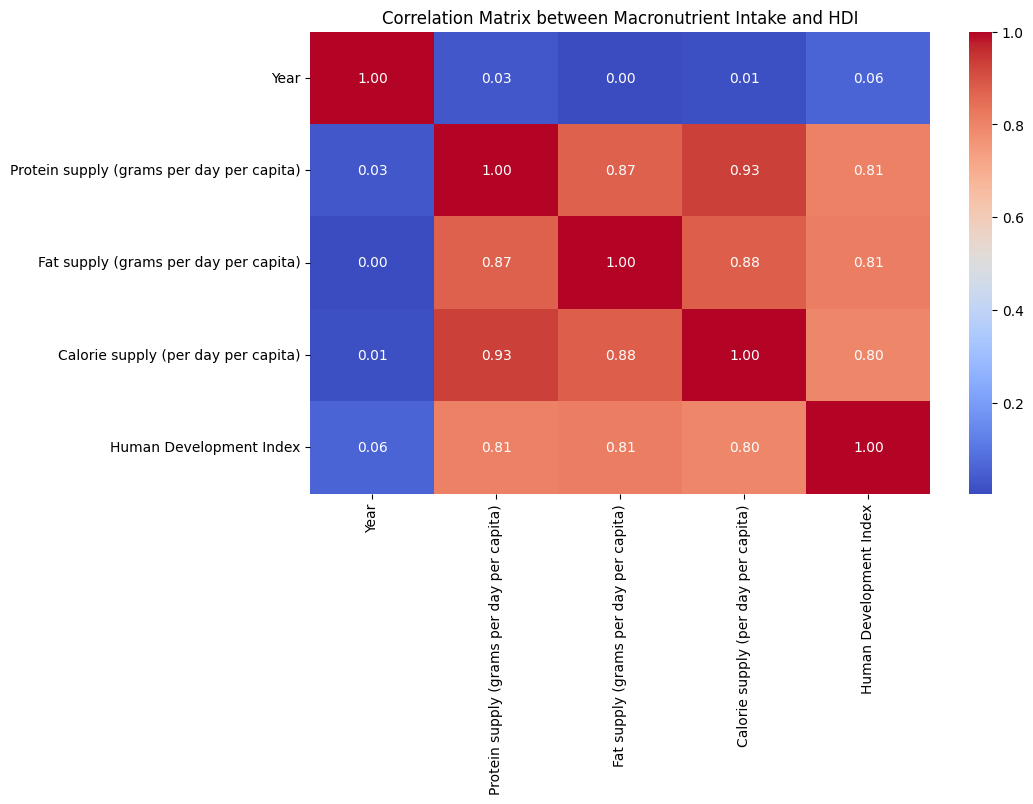

In [17]:
# Select only numeric columns for the correlation matrix
numeric_columns = combined_data.select_dtypes(include=['number'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()
display("Correlation Matrix:", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Macronutrient Intake and HDI')
plt.show()

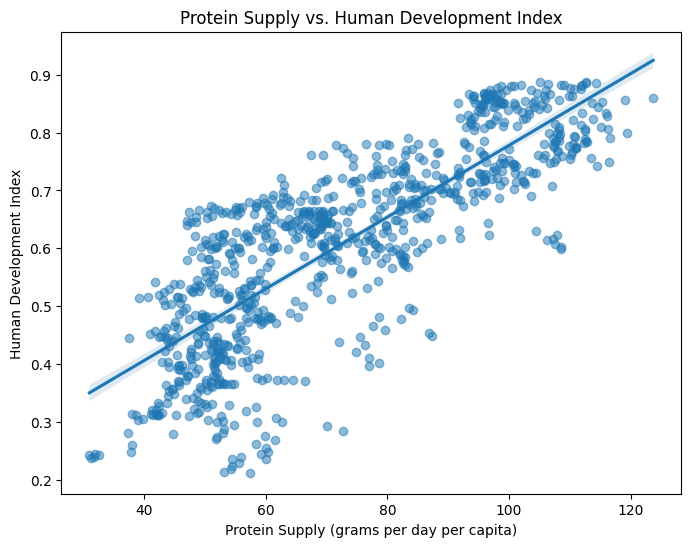

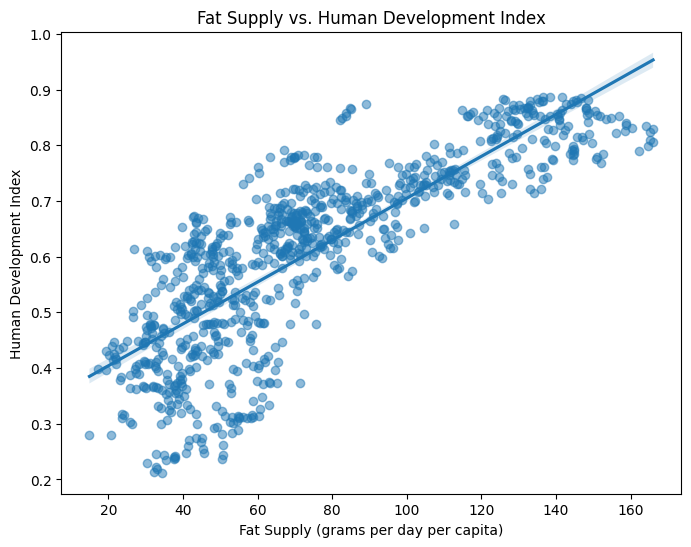

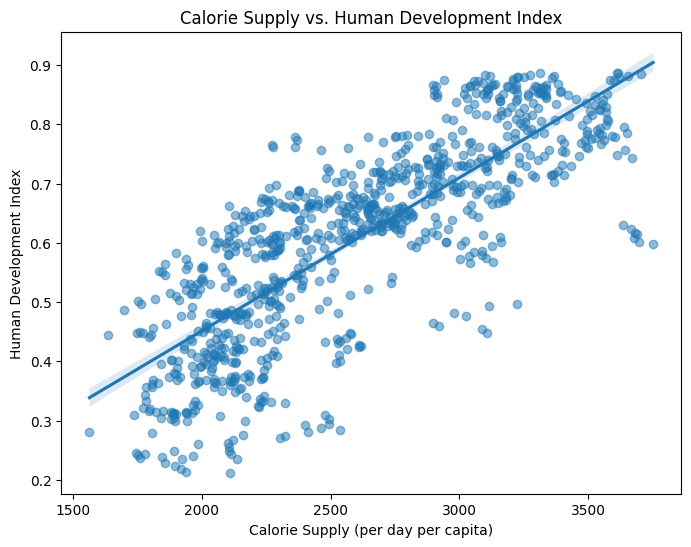

In [18]:
# Scatter plot with regression line: Protein supply vs. HDI
plt.figure(figsize=(8, 6))
sns.regplot(x='Protein supply (grams per day per capita)', y='Human Development Index', data=combined_data, scatter_kws={'alpha':0.5})
plt.title('Protein Supply vs. Human Development Index')
plt.xlabel('Protein Supply (grams per day per capita)')
plt.ylabel('Human Development Index')
plt.show()

# Scatter plot with regression line: Fat supply vs. HDI
plt.figure(figsize=(8, 6))
sns.regplot(x='Fat supply (grams per day per capita)', y='Human Development Index', data=combined_data, scatter_kws={'alpha':0.5})
plt.title('Fat Supply vs. Human Development Index')
plt.xlabel('Fat Supply (grams per day per capita)')
plt.ylabel('Human Development Index')
plt.show()

# Scatter plot with regression line: Calorie supply vs. HDI
plt.figure(figsize=(8, 6))
sns.regplot(x='Calorie supply (per day per capita)', y='Human Development Index', data=combined_data, scatter_kws={'alpha':0.5})
plt.title('Calorie Supply vs. Human Development Index')
plt.xlabel('Calorie Supply (per day per capita)')
plt.ylabel('Human Development Index')
plt.show()

In [19]:
# Define the features and the target variable
X = combined_data[['Protein supply (grams per day per capita)', 'Fat supply (grams per day per capita)', 'Calorie supply (per day per capita)']]
y = combined_data['Human Development Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model coefficients, mean squared error, and R^2 score
model_coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Model Coefficients:\n")
display(model_coefficients)

model_performance = pd.DataFrame({'Mean Squared Error': [mse], 'R^2 Score': [r2]})
print("Model Coefficients:\n")
display(model_performance)

Model Coefficients:



,Coefficient
Protein supply (grams per day per capita),0.002302
Fat supply (grams per day per capita),0.002031
Calorie supply (per day per capita),0.000041


Model Coefficients:



,Mean Squared Error,R^2 Score
0,0.007385,0.746045


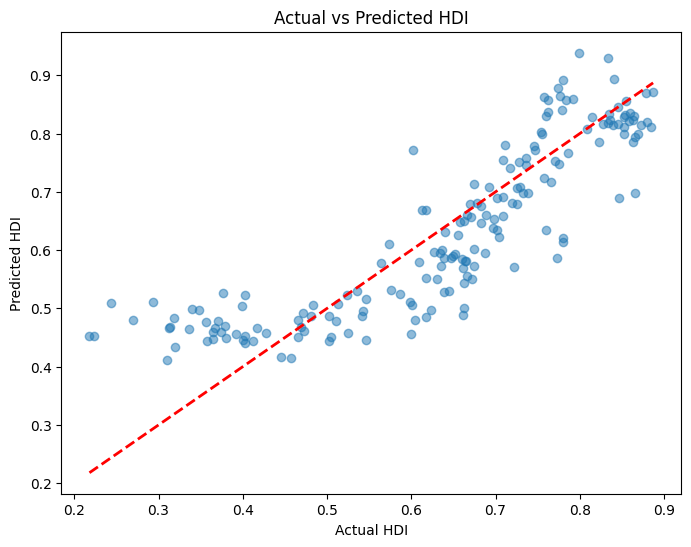

In [20]:
# Scatter plot of actual vs predicted HDI values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual HDI')
plt.ylabel('Predicted HDI')
plt.title('Actual vs Predicted HDI')
plt.show()

In [21]:
#Sub Question 3

In [22]:
display(height_data.head())
display(hdi_data.head())

,Entity,Year,Deaths per 100 births,Mean male height (cm),Wheat Yields (tonnes per hectare),Rice Yields (tonnes per hectare),Banana Yields (tonnes per hectare),Maize Yields (tonnes per hectare),Soybean Yields (tonnes per hectare),Potato Yields (tonnes per hectare),...,Protein supply (grams per day per capita),Fat supply (grams per day per capita),Egg consumption (kilograms per year per capita),Other meats consumption (kilograms per year per capita),Sheep and goat consumption (kilograms per year per capita),Beef consumption (kilograms per year per capita),Pig consumption (kilograms per year per capita),Poultry consumption (kilograms per year per capita),Milk consumption (kilograms per year per capita),Daily calorie supply from animal protein
0,Afghanistan,1961,35.165825,164.797132,1.0220,1.5190,NaN,1.4000,NaN,8.666699,...,86.492840,38.209236,0.957523,0.865845,8.332486,4.889479,NaN,0.641744,60.405430,55.128870
1,Afghanistan,1962,34.583990,164.849830,0.9735,1.5190,NaN,1.4000,NaN,7.666700,...,84.580055,38.335213,1.029475,0.896969,8.072717,5.106605,NaN,0.672726,59.699370,54.959705
2,Afghanistan,1963,34.015938,164.899145,0.8317,1.5190,NaN,1.4260,NaN,8.133300,...,78.657250,39.338820,1.060731,1.091328,8.251259,5.160862,NaN,0.673156,65.143130,57.932200
3,Afghanistan,1964,33.484780,164.943613,0.9510,1.7273,NaN,1.4257,NaN,8.599999,...,85.198880,39.747234,1.081696,1.030673,8.520909,5.132955,NaN,0.683714,65.360985,58.493233
4,Afghanistan,1965,32.942093,164.983130,0.9723,1.7273,NaN,1.4400,NaN,8.800000,...,85.612100,40.560085,1.122982,1.082147,8.820517,5.094256,NaN,0.714625,70.053690,61.008570


,Entity,Year,Deaths per 100 births,Human Development Index,Wheat Yields (tonnes per hectare),Rice Yields (tonnes per hectare),Banana Yields (tonnes per hectare),Maize Yields (tonnes per hectare),Soybean Yields (tonnes per hectare),Potato Yields (tonnes per hectare),...,Protein supply (grams per day per capita),Fat supply (grams per day per capita),Egg consumption (kilograms per year per capita),Other meats consumption (kilograms per year per capita),Sheep and goat consumption (kilograms per year per capita),Beef consumption (kilograms per year per capita),Pig consumption (kilograms per year per capita),Poultry consumption (kilograms per year per capita),Milk consumption (kilograms per year per capita),Daily calorie supply from animal protein
0,Afghanistan,1990,17.845098,0.284,1.0510,1.9029,NaN,1.7582,NaN,16.8421,...,72.635910,53.089370,1.085919,1.053012,12.625178,8.095032,NaN,1.162701,72.252000,74.368996
1,Afghanistan,1991,17.222792,0.292,1.0213,1.9364,NaN,1.6800,NaN,16.6418,...,70.025140,48.264060,1.079838,1.079838,12.781995,8.051835,NaN,1.138525,76.457220,76.245950
2,Afghanistan,1992,16.634613,0.299,1.0313,1.7143,NaN,1.5000,NaN,16.6667,...,62.682700,43.655660,0.962234,1.145517,11.031330,7.170937,NaN,1.053876,70.059830,68.456110
3,Afghanistan,1993,16.077510,0.307,1.0211,1.7143,NaN,1.6786,NaN,16.6912,...,61.583107,35.846720,0.834401,1.061964,9.395135,6.946115,NaN,0.845237,68.214966,63.327760
4,Afghanistan,1994,15.550792,0.300,1.0250,1.9000,NaN,1.6667,NaN,16.5942,...,58.492700,34.003414,0.767957,0.885283,8.682177,7.338253,NaN,0.757291,73.233200,64.039055


In [23]:
height_data_selected = height_data[['Entity', 'Year', 'Mean male height (cm)', 'Wheat Yields (tonnes per hectare)', 
                                    'Rice Yields (tonnes per hectare)', 'Banana Yields (tonnes per hectare)', 
                                    'Maize Yields (tonnes per hectare)', 'Soybean Yields (tonnes per hectare)', 
                                    'Potato Yields (tonnes per hectare)', 'Deaths per 100 births']]

hdi_data_selected = hdi_data[['Entity', 'Year', 'Human Development Index']]

In [24]:
combined_data = pd.merge(height_data_selected, hdi_data_selected, on=['Entity', 'Year'])

# Rename columns for easier referencing
combined_data.rename(columns={
    'Mean male height (cm)': 'height',
    'Wheat Yields (tonnes per hectare)': 'wheat_yield',
    'Rice Yields (tonnes per hectare)': 'rice_yield',
    'Banana Yields (tonnes per hectare)': 'banana_yield',
    'Maize Yields (tonnes per hectare)': 'maize_yield',
    'Soybean Yields (tonnes per hectare)': 'soybean_yield',
    'Potato Yields (tonnes per hectare)': 'potato_yield',
    'Deaths per 100 births': 'infant_mortality'
}, inplace=True)

combined_data.fillna(combined_data.select_dtypes(include=[float, int]).mean(), inplace=True)

# Display the first few rows to verify
display(combined_data.head())

,Entity,Year,height,wheat_yield,rice_yield,banana_yield,maize_yield,soybean_yield,potato_yield,infant_mortality,Human Development Index
0,Afghanistan,1990,165.340645,1.0510,1.9029,17.840139,1.7582,1.558205,16.8421,17.845098,0.284
1,Afghanistan,1991,165.326165,1.0213,1.9364,17.840139,1.6800,1.558205,16.6418,17.222792,0.292
2,Afghanistan,1992,165.312076,1.0313,1.7143,17.840139,1.5000,1.558205,16.6667,16.634613,0.299
3,Afghanistan,1993,165.298103,1.0211,1.7143,17.840139,1.6786,1.558205,16.6912,16.077510,0.307
4,Afghanistan,1994,165.284148,1.0250,1.9000,17.840139,1.6667,1.558205,16.5942,15.550792,0.300


In [25]:
display(combined_data.describe())

,Year,height,wheat_yield,rice_yield,banana_yield,maize_yield,soybean_yield,potato_yield,infant_mortality,Human Development Index
count,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000
mean,1993.115213,171.272702,2.726413,3.264421,17.840139,3.100410,1.558205,16.546286,6.419730,0.606938
std,1.998637,5.194204,1.535365,1.444801,10.794092,2.917315,0.512996,8.398092,6.257905,0.165231
min,1990.000000,159.886941,0.195900,0.298800,1.700800,0.130300,0.005000,1.614200,0.454854,0.212000
25%,1991.000000,167.309742,1.769425,2.326850,11.270825,1.382725,1.457750,10.933525,1.491140,0.480000
50%,1993.000000,171.027364,2.726413,3.264421,17.840139,2.144900,1.558205,16.262150,4.336125,0.630000
75%,1995.000000,174.875283,2.867225,3.634000,17.840139,3.136800,1.558205,19.664750,10.197669,0.728750
max,1996.000000,182.547368,8.996500,9.149199,77.592200,20.379200,3.752500,48.721897,33.162117,0.887000


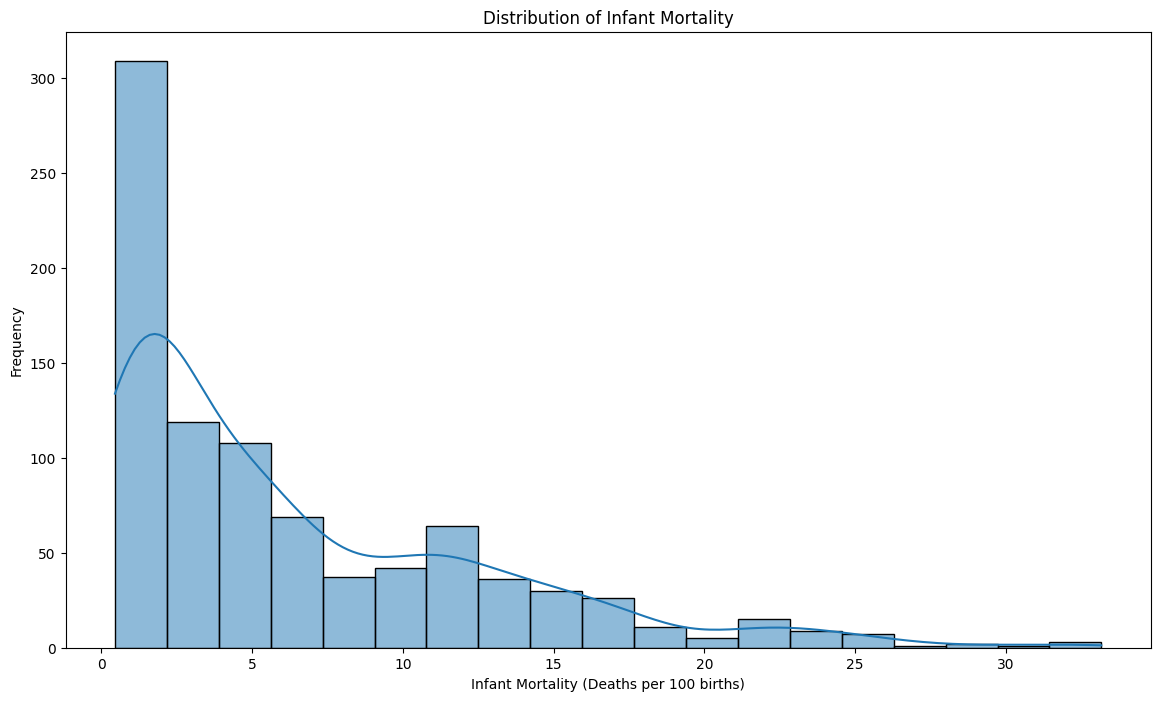

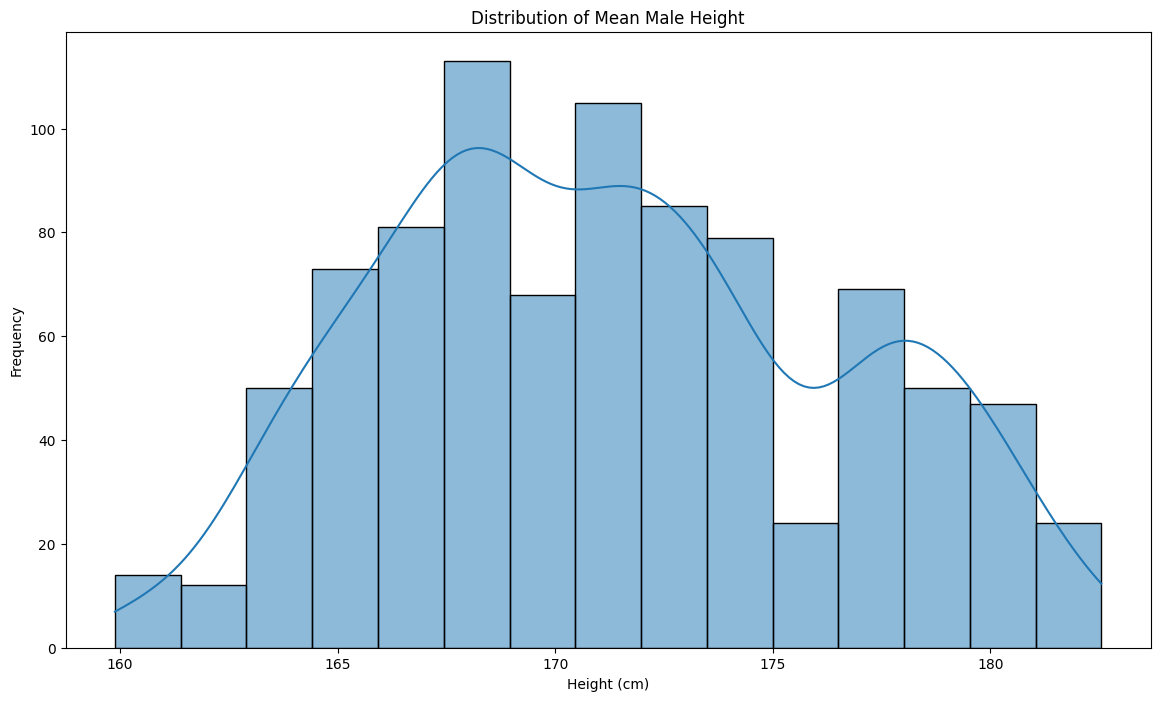

In [26]:
plt.figure(figsize=(14, 8))
sns.histplot(combined_data['infant_mortality'], kde=True)
plt.title('Distribution of Infant Mortality')
plt.xlabel('Infant Mortality (Deaths per 100 births)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(combined_data['height'], kde=True)
plt.title('Distribution of Mean Male Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

Correlation Matrix:


,Year,height,wheat_yield,rice_yield,banana_yield,maize_yield,soybean_yield,potato_yield,infant_mortality,Human Development Index
Year,1.000000,0.027082,-0.000082,0.021642,0.029122,0.019714,0.005168,0.034610,-0.062213,0.060896
height,0.027082,1.000000,0.470513,0.331389,0.091434,0.456625,0.283936,0.498703,-0.621827,0.743171
wheat_yield,-0.000082,0.470513,1.000000,0.101218,-0.024958,0.276511,0.200417,0.605240,-0.299849,0.427305
rice_yield,0.021642,0.331389,0.101218,1.000000,0.261566,0.342614,0.371848,0.257859,-0.477270,0.468893
banana_yield,0.029122,0.091434,-0.024958,0.261566,1.000000,0.084994,0.150664,0.171733,-0.177772,0.135518
maize_yield,0.019714,0.456625,0.276511,0.342614,0.084994,1.000000,0.335914,0.511992,-0.449221,0.543864
soybean_yield,0.005168,0.283936,0.200417,0.371848,0.150664,0.335914,1.000000,0.335954,-0.266646,0.316897
potato_yield,0.034610,0.498703,0.605240,0.257859,0.171733,0.511992,0.335954,1.000000,-0.388537,0.538757
infant_mortality,-0.062213,-0.621827,-0.299849,-0.477270,-0.177772,-0.449221,-0.266646,-0.388537,1.000000,-0.910841
Human Development Index,0.060896,0.743171,0.427305,0.468893,0.135518,0.543864,0.316897,0.538757,-0.910841,1.000000


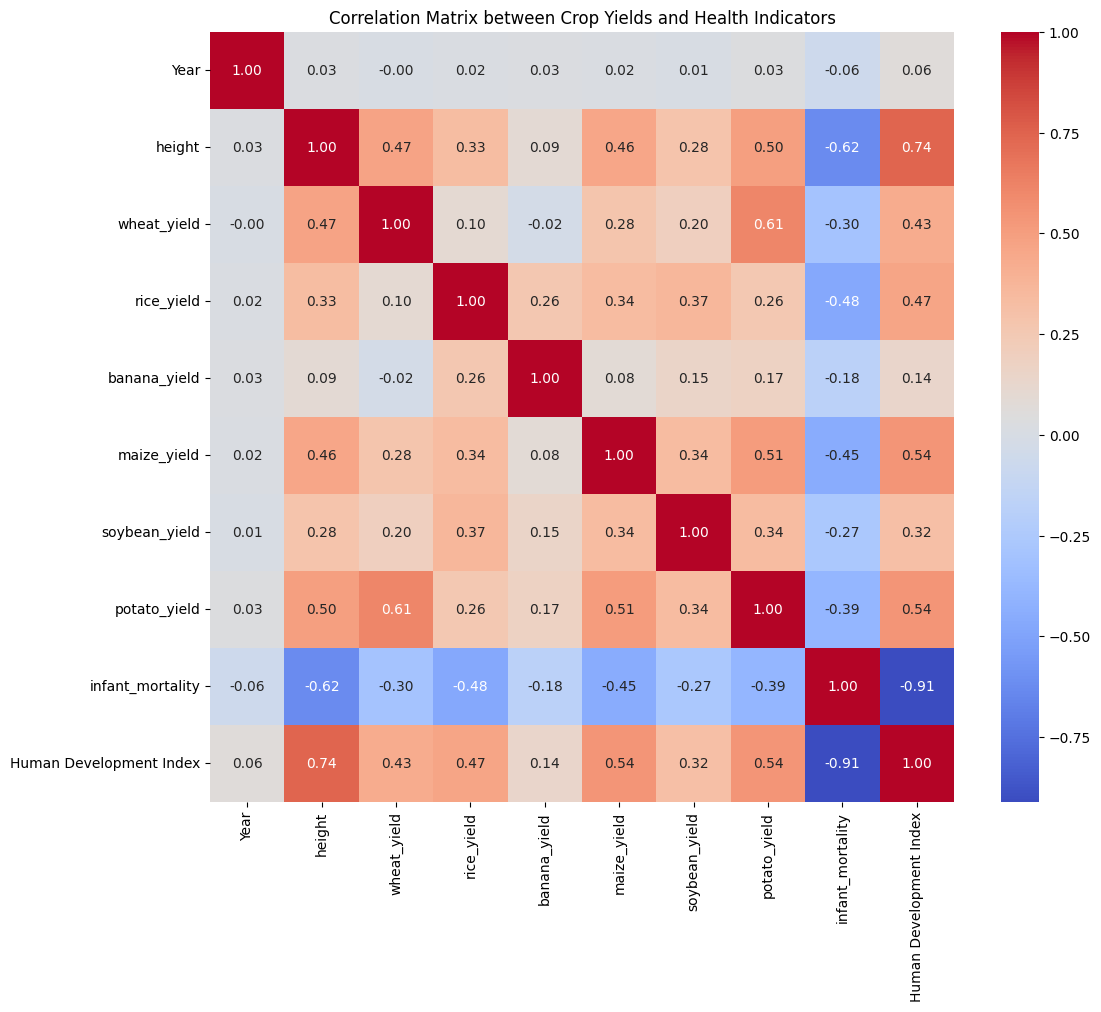

In [27]:
# Correlation matrix
numeric_columns = combined_data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
print("Correlation Matrix:")
display(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Crop Yields and Health Indicators')
plt.show()


In [28]:
# Define the independent variables (crop yields) and dependent variables (height, infant mortality)
X = combined_data[['wheat_yield', 'rice_yield', 'banana_yield', 'maize_yield', 'soybean_yield', 'potato_yield']]
X = sm.add_constant(X)  # Add a constant term for the intercept

# Dependent variable: height
y_height = combined_data['height']
model_height = sm.OLS(y_height, X).fit()
display(model_height.summary())

# Dependent variable: infant_mortality
y_infant_mortality = combined_data['infant_mortality']
model_infant_mortality = sm.OLS(y_infant_mortality, X).fit()
display(model_infant_mortality.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     91.88
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.17e-89
Time:                        03:31:58   Log-Likelihood:                -2524.9
No. Observations:                 894   AIC:                             5064.
Df Residuals:                     887   BIC:                             5097.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           163.2049      0.521    313.288      0.000     162.182     164.227
wheat_yield       0.9949      0.114      8.740      0.000       0.772       1.218
rice_yield        0.6159      0.108      5.692      0.000       0.403       0.828
banana_yield      0.0020      0.013      0.146      0.884      -0.024       0.028
maize_yield       0.4088      0.057      7.145      0.000       0.297       0.521
soybean_yield     0.3467      0.302      1.149      0.251      -0.245       0.939
potato_yield      0.0908      0.024      3.822      0.000       0.044       0.137
==============================================================================
Omnibus:                        2.125   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.971
Skew:                           0.097   Prob(JB):                        0.373
Kurtosis:                       3.123   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       infant_mortality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     82.95
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           2.11e-82
Time:                        03:31:58   Log-Likelihood:                -2708.4
No. Observations:                 894   AIC:                             5431.
Df Residuals:                     887   BIC:                             5464.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.0055      0.640     25.022      0.000      14.750      17.261
wheat_yield      -0.6410      0.140     -4.586      0.000      -0.915      -0.367
rice_yield       -1.4981      0.133    -11.276      0.000      -1.759      -1.237
banana_yield     -0.0345      0.016     -2.093      0.037      -0.067      -0.002
maize_yield      -0.5363      0.070     -7.633      0.000      -0.674      -0.398
soybean_yield     0.1181      0.370      0.319      0.750      -0.609       0.845
potato_yield     -0.0516      0.029     -1.768      0.077      -0.109       0.006
==============================================================================
Omnibus:                      203.004   Durbin-Watson:                   0.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              486.415
Skew:                           1.203   Prob(JB):                    2.38e-106
Kurtosis:                       5.696   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#Sub Question 4

In [30]:
# Select relevant columns for the analysis
height_data_selected = height_data[['Entity', 'Year', 'Wheat Yields (tonnes per hectare)', 'Rice Yields (tonnes per hectare)', 
                                    'Banana Yields (tonnes per hectare)', 'Maize Yields (tonnes per hectare)', 
                                    'Soybean Yields (tonnes per hectare)', 'Potato Yields (tonnes per hectare)']]
hdi_data_selected = hdi_data[['Entity', 'Year', 'Human Development Index']]

# Merge the datasets on 'Entity' and 'Year'
combined_data = pd.merge(height_data_selected, hdi_data_selected, on=['Entity', 'Year'])

# Impute missing values with the mean for numerical columns
combined_data_imputed = combined_data.copy()
numeric_columns = combined_data_imputed.select_dtypes(include=['number']).columns
combined_data_imputed[numeric_columns] = combined_data_imputed[numeric_columns].fillna(combined_data_imputed[numeric_columns].mean())

combined_data_imputed.head()

,Entity,Year,Wheat Yields (tonnes per hectare),Rice Yields (tonnes per hectare),Banana Yields (tonnes per hectare),Maize Yields (tonnes per hectare),Soybean Yields (tonnes per hectare),Potato Yields (tonnes per hectare),Human Development Index
0,Afghanistan,1990,1.0510,1.9029,17.840139,1.7582,1.558205,16.8421,0.284
1,Afghanistan,1991,1.0213,1.9364,17.840139,1.6800,1.558205,16.6418,0.292
2,Afghanistan,1992,1.0313,1.7143,17.840139,1.5000,1.558205,16.6667,0.299
3,Afghanistan,1993,1.0211,1.7143,17.840139,1.6786,1.558205,16.6912,0.307
4,Afghanistan,1994,1.0250,1.9000,17.840139,1.6667,1.558205,16.5942,0.300


,Year,Wheat Yields (tonnes per hectare),Rice Yields (tonnes per hectare),Banana Yields (tonnes per hectare),Maize Yields (tonnes per hectare),Soybean Yields (tonnes per hectare),Potato Yields (tonnes per hectare),Human Development Index
Year,1.000000,-0.000082,0.021642,0.029122,0.019714,0.005168,0.034610,0.060896
Wheat Yields (tonnes per hectare),-0.000082,1.000000,0.101218,-0.024958,0.276511,0.200417,0.605240,0.427305
Rice Yields (tonnes per hectare),0.021642,0.101218,1.000000,0.261566,0.342614,0.371848,0.257859,0.468893
Banana Yields (tonnes per hectare),0.029122,-0.024958,0.261566,1.000000,0.084994,0.150664,0.171733,0.135518
Maize Yields (tonnes per hectare),0.019714,0.276511,0.342614,0.084994,1.000000,0.335914,0.511992,0.543864
Soybean Yields (tonnes per hectare),0.005168,0.200417,0.371848,0.150664,0.335914,1.000000,0.335954,0.316897
Potato Yields (tonnes per hectare),0.034610,0.605240,0.257859,0.171733,0.511992,0.335954,1.000000,0.538757
Human Development Index,0.060896,0.427305,0.468893,0.135518,0.543864,0.316897,0.538757,1.000000


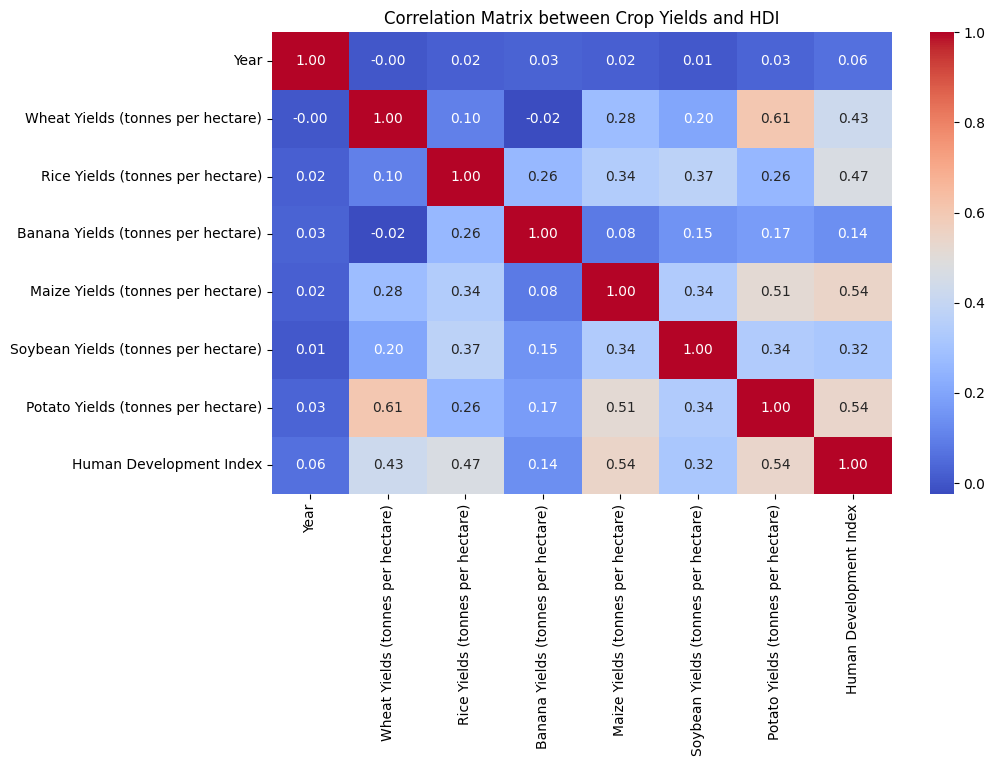

In [31]:
# Select only numeric columns for the correlation matrix
numeric_columns = combined_data_imputed.select_dtypes(include=['number'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()
display(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Crop Yields and HDI')
plt.show()

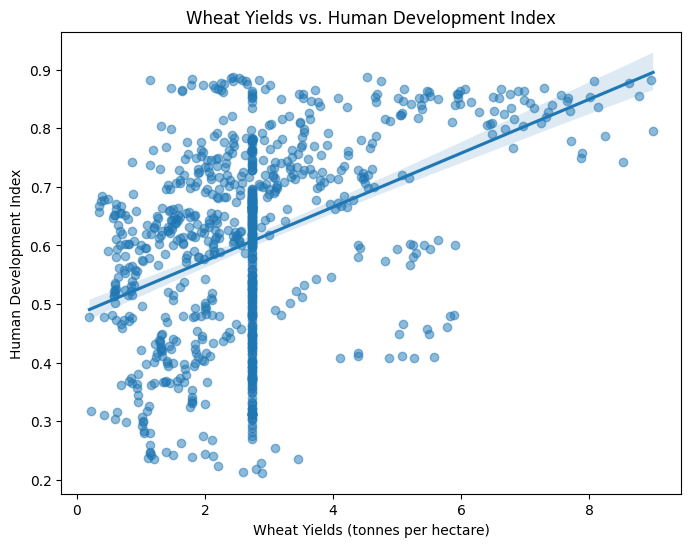

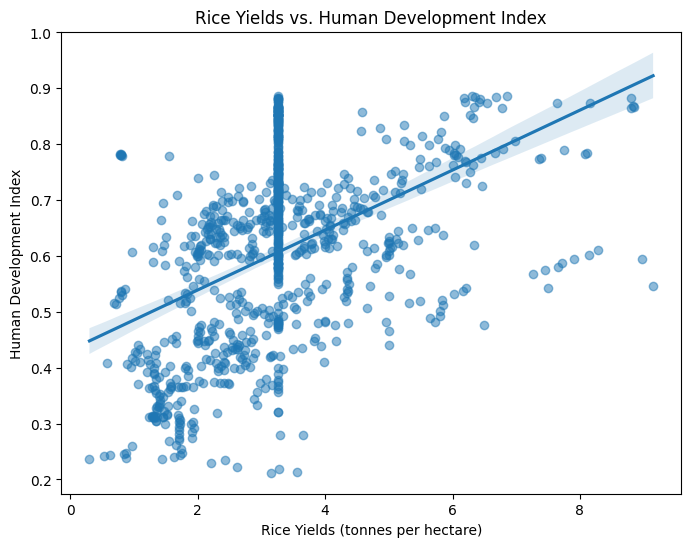

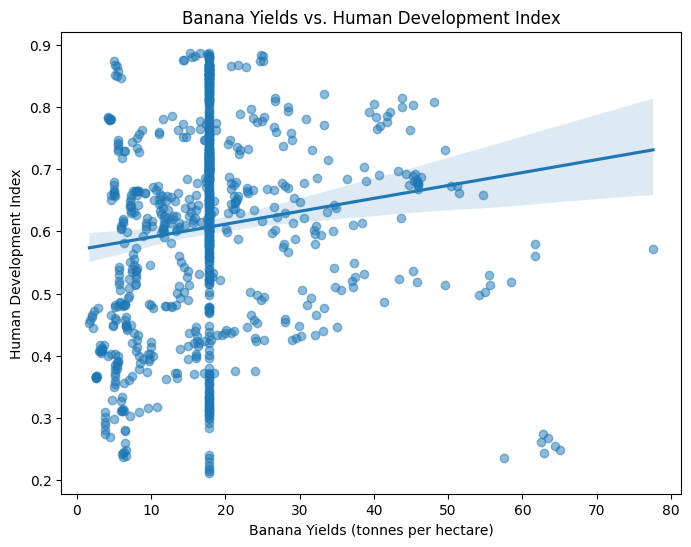

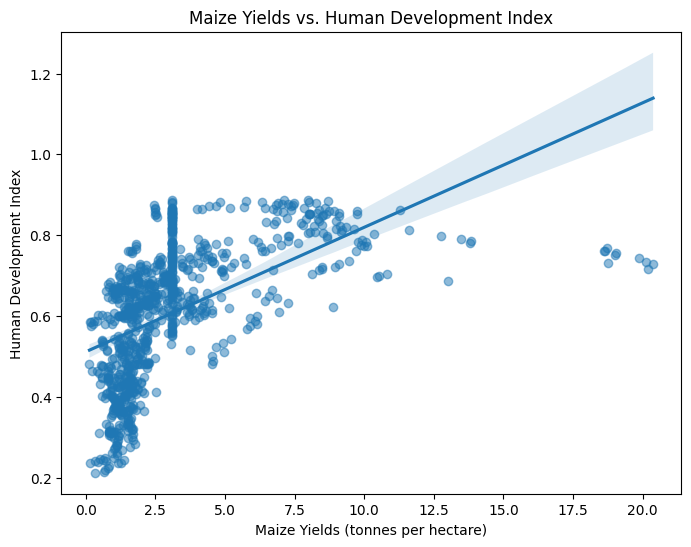

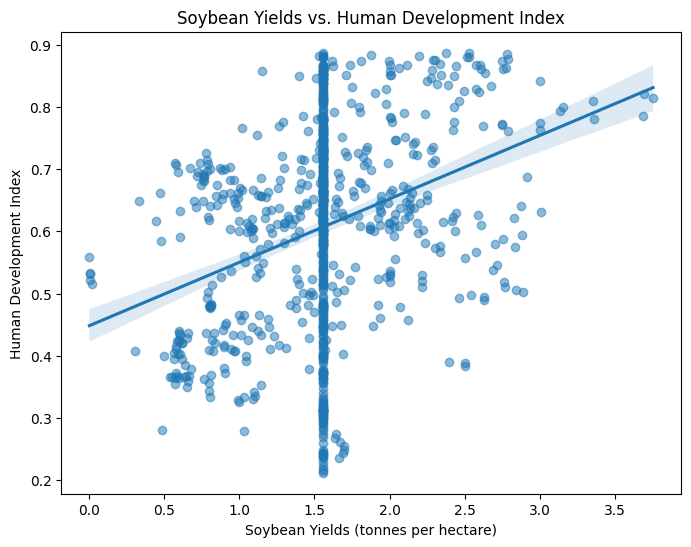

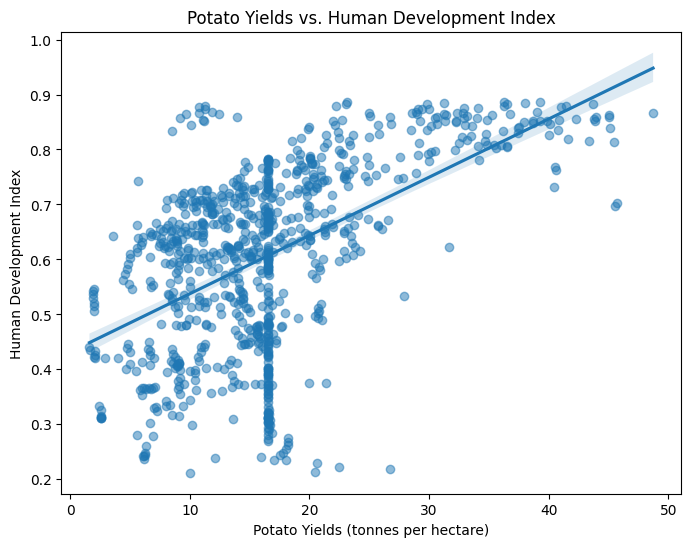

In [32]:
# Scatter plot with regression line: Wheat Yields vs. HDI
plt.figure(figsize=(8, 6))
sns.regplot(x='Wheat Yields (tonnes per hectare)', y='Human Development Index', data=combined_data_imputed, scatter_kws={'alpha':0.5})
plt.title('Wheat Yields vs. Human Development Index')
plt.xlabel('Wheat Yields (tonnes per hectare)')
plt.ylabel('Human Development Index')
plt.show()

# Scatter plot with regression line: Rice Yields vs. HDI
plt.figure(figsize=(8, 6))
sns.regplot(x='Rice Yields (tonnes per hectare)', y='Human Development Index', data=combined_data_imputed, scatter_kws={'alpha':0.5})
plt.title('Rice Yields vs. Human Development Index')
plt.xlabel('Rice Yields (tonnes per hectare)')
plt.ylabel('Human Development Index')
plt.show()

# Scatter plot with regression line: Banana Yields vs. HDI
plt.figure(figsize=(8, 6))
sns.regplot(x='Banana Yields (tonnes per hectare)', y='Human Development Index', data=combined_data_imputed, scatter_kws={'alpha':0.5})
plt.title('Banana Yields vs. Human Development Index')
plt.xlabel('Banana Yields (tonnes per hectare)')
plt.ylabel('Human Development Index')
plt.show()

# Scatter plot with regression line: Maize Yields vs. HDI
plt.figure(figsize=(8, 6))
sns.regplot(x='Maize Yields (tonnes per hectare)', y='Human Development Index', data=combined_data_imputed, scatter_kws={'alpha':0.5})
plt.title('Maize Yields vs. Human Development Index')
plt.xlabel('Maize Yields (tonnes per hectare)')
plt.ylabel('Human Development Index')
plt.show()

# Scatter plot with regression line: Soybean Yields vs. HDI
plt.figure(figsize=(8, 6))
sns.regplot(x='Soybean Yields (tonnes per hectare)', y='Human Development Index', data=combined_data_imputed, scatter_kws={'alpha':0.5})
plt.title('Soybean Yields vs. Human Development Index')
plt.xlabel('Soybean Yields (tonnes per hectare)')
plt.ylabel('Human Development Index')
plt.show()

# Scatter plot with regression line: Potato Yields vs. HDI
plt.figure(figsize=(8, 6))
sns.regplot(x='Potato Yields (tonnes per hectare)', y='Human Development Index', data=combined_data_imputed, scatter_kws={'alpha':0.5})
plt.title('Potato Yields vs. Human Development Index')
plt.xlabel('Potato Yields (tonnes per hectare)')
plt.ylabel('Human Development Index')
plt.show()

In [33]:
# Define the features and the target variable
X = combined_data_imputed[['Wheat Yields (tonnes per hectare)', 'Rice Yields (tonnes per hectare)', 
                           'Banana Yields (tonnes per hectare)', 'Maize Yields (tonnes per hectare)', 
                           'Soybean Yields (tonnes per hectare)', 'Potato Yields (tonnes per hectare)']]
y = combined_data_imputed['Human Development Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model coefficients, mean squared error, and R^2 score
model_coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Model Coefficients:")
display(model_coefficients)

model_performance = pd.DataFrame({'Mean Squared Error': [mse], 'R^2 Score': [r2]})
print("Model Performance:")
display(model_performance)

Model Coefficients:


,Coefficient
Wheat Yields (tonnes per hectare),0.019451
Rice Yields (tonnes per hectare),0.033243
Banana Yields (tonnes per hectare),0.000006
Maize Yields (tonnes per hectare),0.014807
Soybean Yields (tonnes per hectare),0.000069
Potato Yields (tonnes per hectare),0.004779


Model Performance:


,Mean Squared Error,R^2 Score
0,0.016701,0.425664
